In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder ,RobustScaler
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [74]:
df=pd.read_csv('loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [76]:
df.person_age.astype('int64')

,person_age
0,22
1,21
2,25
3,23
4,24
...,...
44995,27
44996,37
44997,33
44998,29


In [77]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [78]:
df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [79]:
for feature in df.select_dtypes(include=['number']):
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  if df[(df[feature]< lower_bound) | (df[feature]> upper_bound)] .any().any():
    print(feature,"Yes")

  else:
    print(feature,"No")



person_age Yes
person_income Yes
person_emp_exp Yes
loan_amnt Yes
loan_int_rate Yes
loan_percent_income Yes
cb_person_cred_hist_length Yes
credit_score Yes
loan_status Yes


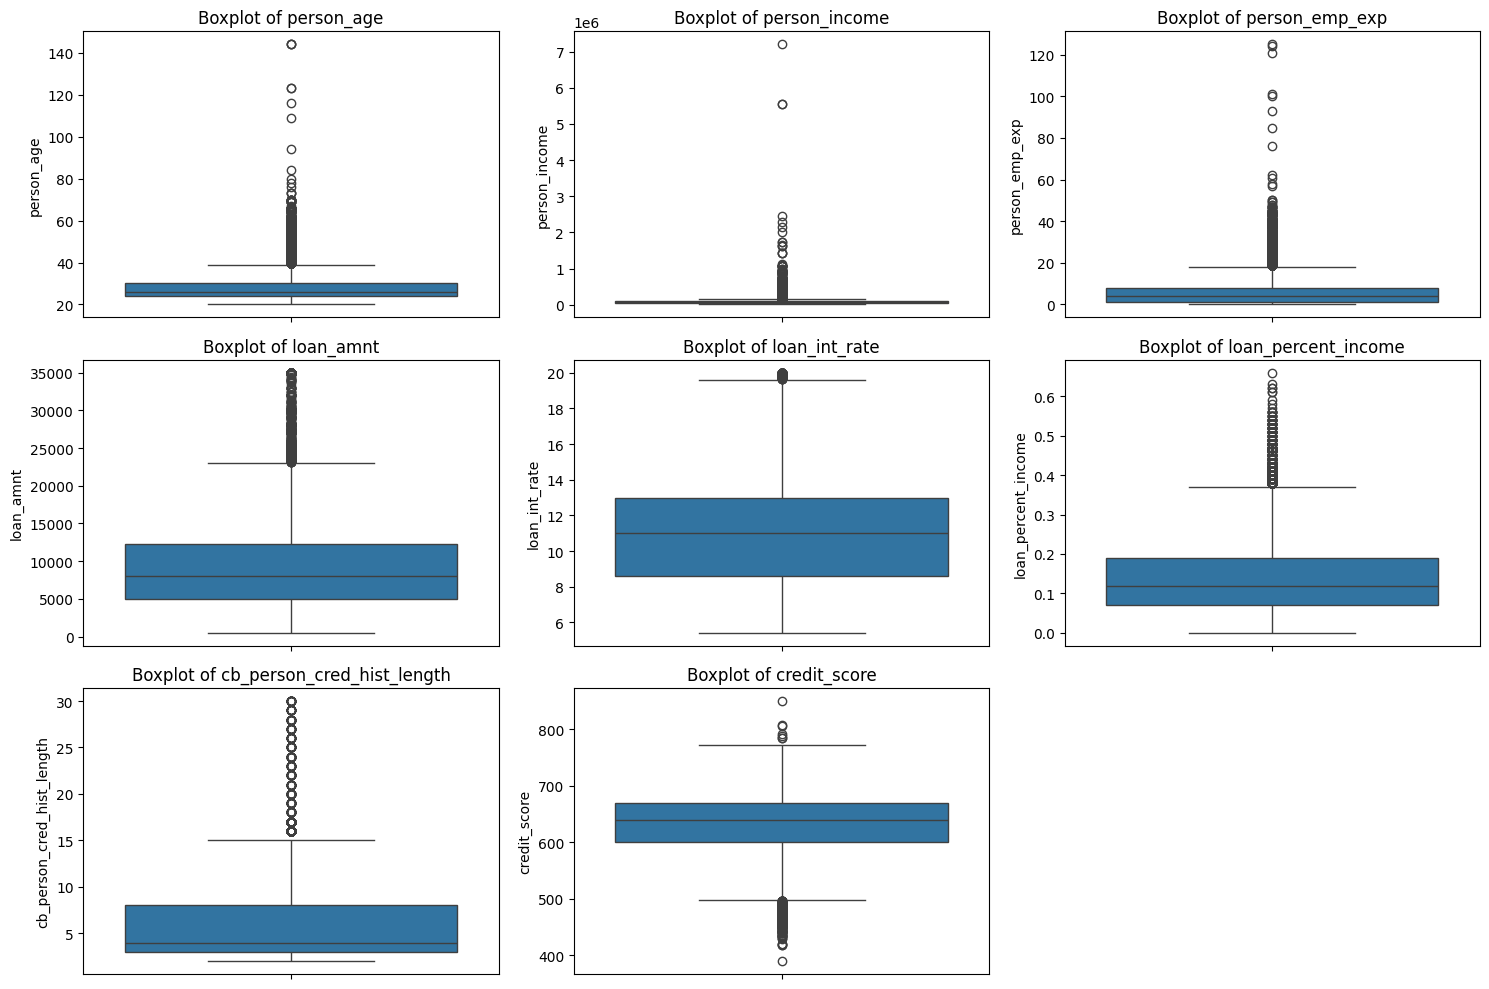

In [80]:


numeric_cols = ["person_age", "person_income", "person_emp_exp", "loan_amnt", "loan_int_rate",
                "loan_percent_income", "cb_person_cred_hist_length", "credit_score"]

num_cols = len(numeric_cols)
rows = (num_cols // 3) + 1
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



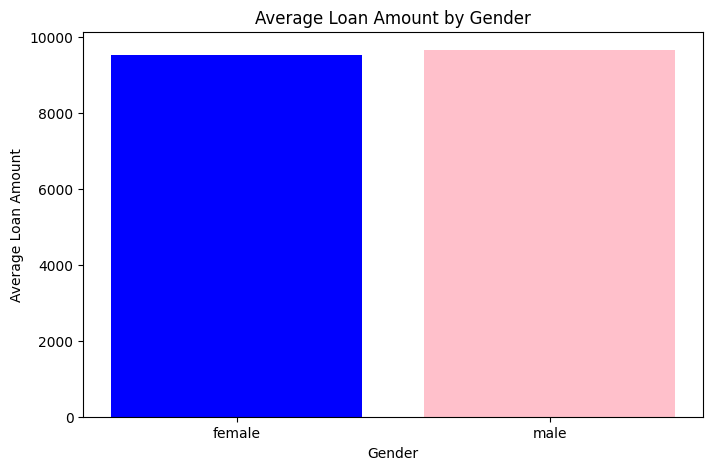

In [81]:

avg_loan_by_gender = df.groupby("person_gender")["loan_amnt"].mean()

plt.figure(figsize=(8, 5))
plt.bar(avg_loan_by_gender.index, avg_loan_by_gender.values, color=['blue', 'pink'])  # x = التصنيفات, y = القيم
plt.xlabel("Gender")
plt.ylabel("Average Loan Amount")
plt.title("Average Loan Amount by Gender")
plt.show()



<Axes: xlabel='loan_status'>

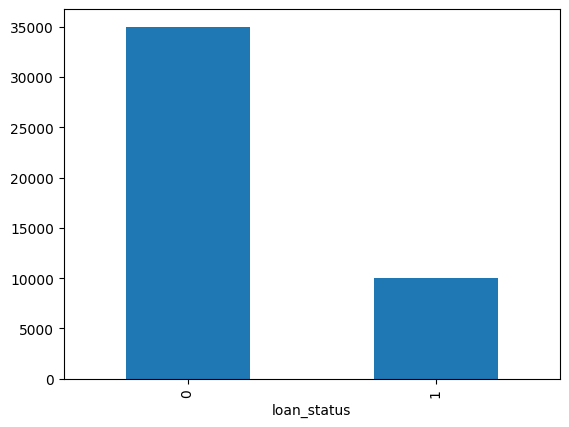

In [82]:
df['loan_status'].value_counts().plot(kind='bar')


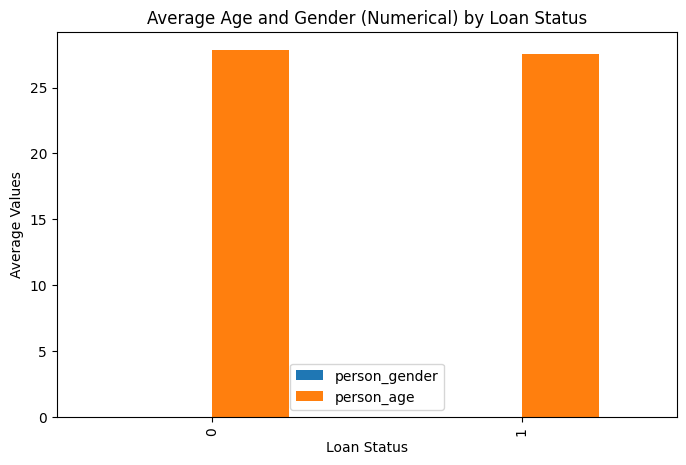

In [83]:

df["person_gender"] = df["person_gender"].map({"Female": 0, "Male": 1})

df.groupby("loan_status")[["person_gender", "person_age"]].mean().plot(kind="bar", figsize=(8, 5))
plt.xlabel("Loan Status")
plt.ylabel("Average Values")
plt.title("Average Age and Gender (Numerical) by Loan Status")
plt.show()

In [84]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

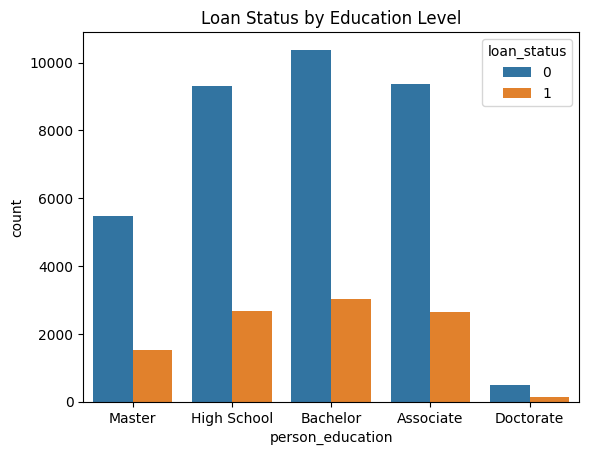

In [85]:

sns.countplot(x="person_education", hue="loan_status", data=df)
plt.title("Loan Status by Education Level")
plt.show()


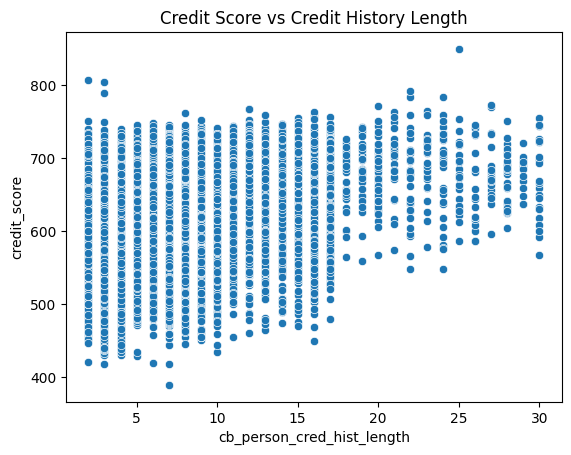

In [86]:
sns.scatterplot(x="cb_person_cred_hist_length", y="credit_score", data=df)
plt.title("Credit Score vs Credit History Length")
plt.show()


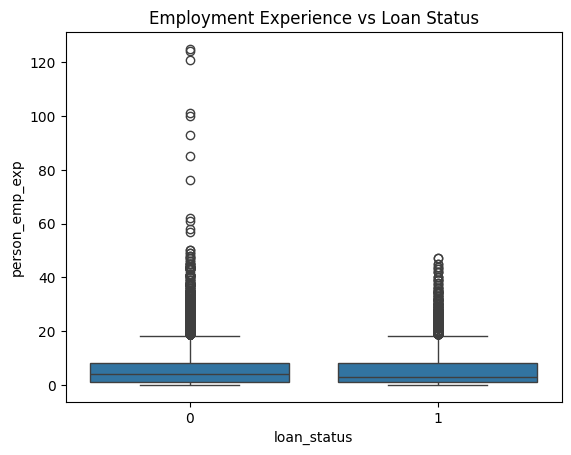

In [90]:
sns.boxplot(x="loan_status", y="person_emp_exp", data=df)
plt.title("Employment Experience vs Loan Status")
plt.show()


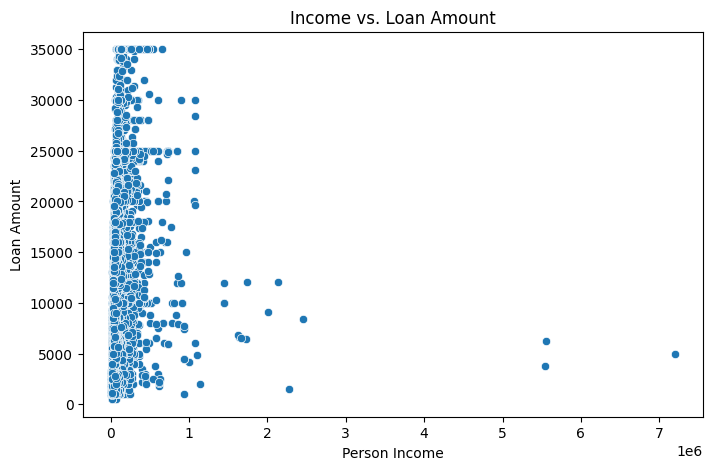

In [91]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["person_income"], y=df["loan_amnt"])
plt.title("Income vs. Loan Amount")
plt.xlabel("Person Income")
plt.ylabel("Loan Amount")
plt.show()


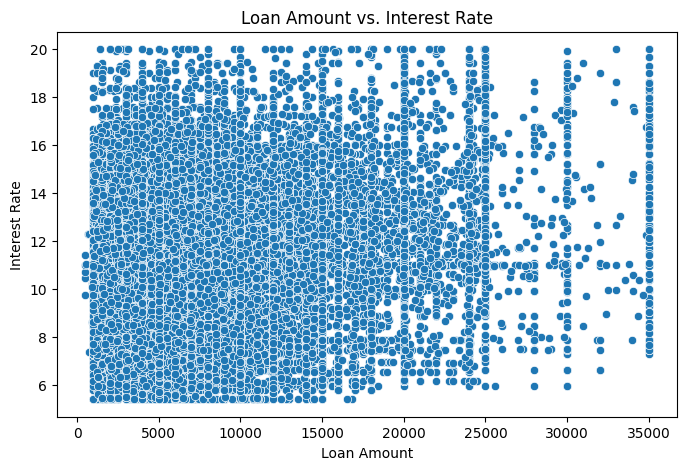

In [92]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["loan_amnt"], y=df["loan_int_rate"])
plt.title("Loan Amount vs. Interest Rate")
plt.xlabel("Loan Amount")
plt.ylabel("Interest Rate")
plt.show()


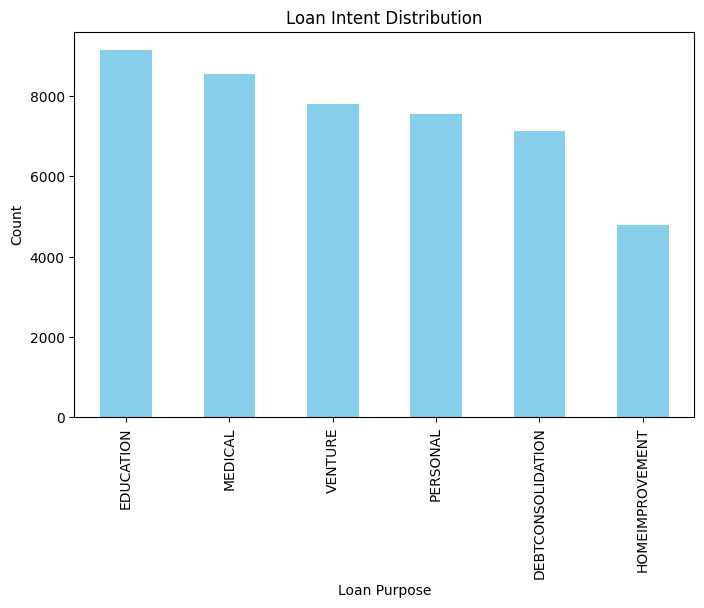

In [93]:
plt.figure(figsize=(8, 5))
df["loan_intent"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Loan Intent Distribution")
plt.xlabel("Loan Purpose")
plt.ylabel("Count")
plt.show()


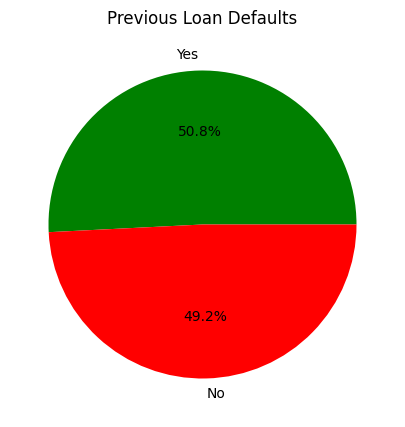

In [94]:
plt.figure(figsize=(8, 5))
df["previous_loan_defaults_on_file"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["green", "red"])
plt.title("Previous Loan Defaults")
plt.ylabel("")
plt.show()


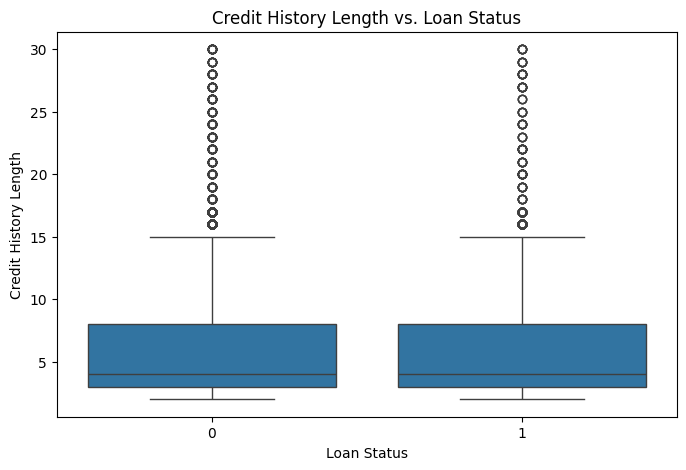

In [97]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["loan_status"], y=df["cb_person_cred_hist_length"])
plt.title("Credit History Length vs. Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Credit History Length")
plt.show()


In [10]:
for feature in ['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income',
               'cb_person_cred_hist_length','credit_score']:
               Q1 = df[feature].quantile(0.25)
               Q3 = df[feature].quantile(0.75)
               IQR = Q3 - Q1
               lower_bound = Q1 - 1.5 * IQR
               upper_bound = Q3 + 1.5 * IQR
               df1 =df[(df[feature]>=lower_bound)& (df[feature]<=upper_bound)]

In [11]:
categorical_col = df1.select_dtypes(include=['object'])
categorical_col

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,No
44996,female,Associate,RENT,HOMEIMPROVEMENT,No
44997,male,Associate,RENT,DEBTCONSOLIDATION,No
44998,male,Bachelor,RENT,EDUCATION,No


In [12]:
le = LabelEncoder()
for col in categorical_col:
    df[col] = le.fit_transform(df[col])

In [13]:
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [14]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [15]:
Xtrain , Xtest,Ytrain, Ytest = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [16]:
model_LR = LogisticRegression()
model_LR.fit(Xtrain,Ytrain)

LogisticRegression()

In [17]:
y_pred_LR = model_LR.predict(Xtest)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7000
           1       0.78      0.75      0.77      2000

    accuracy                           0.90      9000
   macro avg       0.86      0.85      0.85      9000
weighted avg       0.90      0.90      0.90      9000



<Axes: >

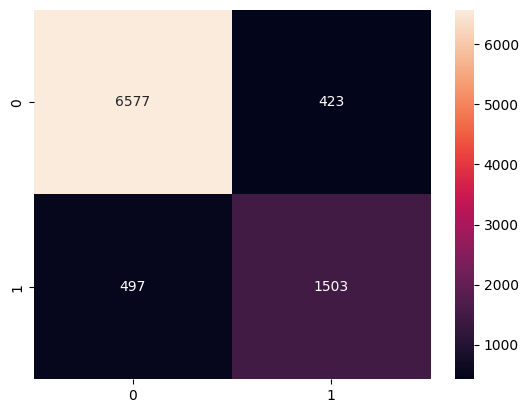

In [18]:
print(classification_report(Ytest,y_pred_LR))
cm=confusion_matrix(Ytest,y_pred_LR)
sns.heatmap(cm,annot=True,fmt='d')

In [19]:
model_LR = LogisticRegression(solver='liblinear', random_state=42)


In [20]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']  ,
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced', None]  # تعيين وزن تلقائي للفئات غير المتوازنة

}
model = GridSearchCV(model_LR, param_grid, cv=15,scoring='accuracy', n_jobs=-1, verbose=1)

In [21]:


model.fit(Xtrain, Ytrain)


Fitting 15 folds for each of 56 candidates, totalling 840 fits


GridSearchCV(cv=15,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [22]:
print("Best Parameters:", model.best_params_)
print("Best Score:", model.best_score_)

cv_results = model.cv_results_

Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.8893611111111112


In [23]:
from sklearn.preprocessing import PolynomialFeatures
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # إضافة ميزات تربيعية
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])
model = GridSearchCV(model_LR, param_grid, cv=15,scoring='accuracy', n_jobs=-1, verbose=1)

In [24]:
model.fit(Xtrain, Ytrain)


Fitting 15 folds for each of 56 candidates, totalling 840 fits


GridSearchCV(cv=15,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [25]:
cv_results = model.cv_results_

In [26]:
cv_results

{'mean_fit_time': array([0.07750015, 0.34109724, 0.06424656, 0.32586702, 0.10454386,
        0.41426872, 0.06805437, 0.27367802, 0.4154786 , 0.42445855,
        0.16801356, 0.34310573, 0.27865063, 0.32945768, 0.09412012,
        0.27232671, 0.62364337, 0.38258624, 0.14530684, 0.28174461,
        0.21675107, 0.45596201, 0.13159412, 0.24946904, 0.67977999,
        1.20284259, 0.2081484 , 0.42843965, 0.37775296, 0.72468704,
        0.20665814, 0.43595119, 0.86125943, 2.41695619, 0.29448862,
        1.41907867, 0.85917406, 2.61011774, 0.60810323, 2.2579675 ,
        1.11397711, 3.74643278, 0.43475733, 2.76222246, 0.58361265,
        2.57988464, 0.24435023, 3.13802961, 1.01334127, 4.34576764,
        0.34619753, 3.30813265, 0.59861509, 2.53339933, 0.25942397,
        1.93267868]),
 'std_fit_time': array([0.00668732, 0.02962303, 0.00469724, 0.05348412, 0.01584062,
        0.10976535, 0.00440081, 0.01322863, 0.03212183, 0.07827142,
        0.02404192, 0.09753074, 0.03258819, 0.02378566, 0.009

In [28]:
model_DT = DecisionTreeClassifier()
model_DT.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

In [29]:
y_pred_DT = model_DT.predict(Xtest)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7000
           1       0.77      0.77      0.77      2000

    accuracy                           0.90      9000
   macro avg       0.85      0.85      0.85      9000
weighted avg       0.90      0.90      0.90      9000



<Axes: >

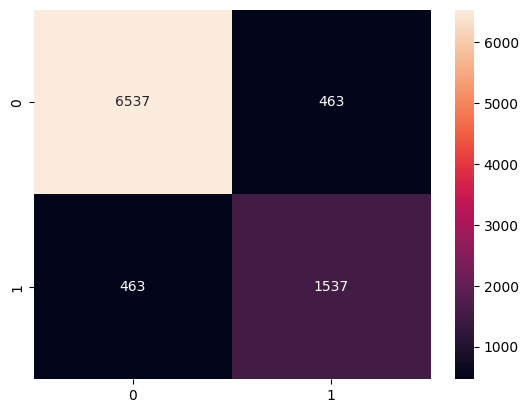

In [30]:
print(classification_report(Ytest,y_pred_DT))
cm=confusion_matrix(Ytest,y_pred_DT)
sns.heatmap(cm,annot=True,fmt='d')

In [31]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]

}

In [32]:
grid_search = GridSearchCV(estimator=model_DT, param_grid=param_grid, cv=15,return_train_score=False)


In [33]:
grid_search.fit(Xtrain, Ytrain)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]})

In [34]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [35]:
best_params

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 10}

In [36]:
Ypred = best_model.predict(Xtest)


In [37]:
Ypred

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
grid_search.best_score_

0.9175555555555556

In [39]:
model_RF = RandomForestClassifier()
model_RF.fit(Xtrain,Ytrain)



RandomForestClassifier()

In [40]:
y_pred_RF = model_RF.predict(Xtest)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7000
           1       0.88      0.77      0.82      2000

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.92      0.93      0.92      9000



<Axes: >

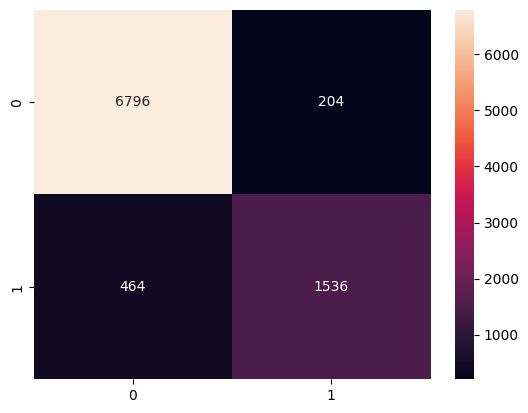

In [41]:
print(classification_report(Ytest,y_pred_RF))
cm=confusion_matrix(Ytest,y_pred_RF)
sns.heatmap(cm,annot=True,fmt='d')

In [51]:
model_SVM = SVC()
model_SVM.fit(Xtrain,Ytrain)

SVC()

In [52]:
y_pred_SVM=model_SVM.predict(Xtest)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7000
           1       0.83      0.74      0.78      2000

    accuracy                           0.91      9000
   macro avg       0.88      0.85      0.86      9000
weighted avg       0.91      0.91      0.91      9000



<Axes: >

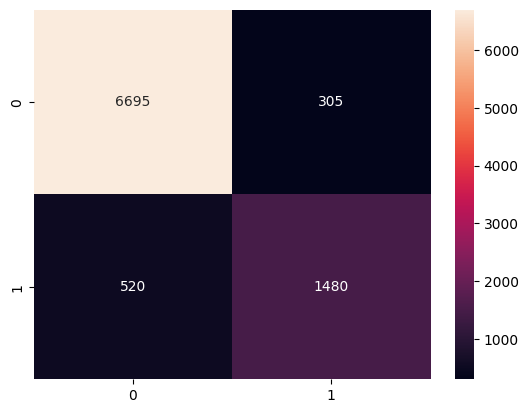

In [53]:
print(classification_report(Ytest,y_pred_SVM))
cm=confusion_matrix(Ytest,y_pred_SVM)
sns.heatmap(cm,annot=True,fmt='d')

In [54]:
model_xgb=XGBClassifier(objective='binary:logistic')
model_xgb.fit(Xtrain,Ytrain)
y_pred_xg=model_xgb.predict(Xtest)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7000
           1       0.89      0.81      0.85      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



<Axes: >

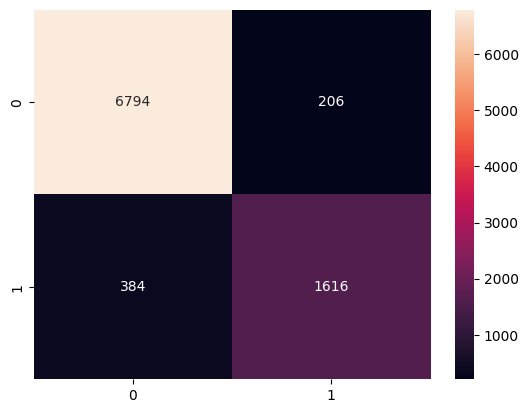

In [55]:
print(classification_report(Ytest,y_pred_xg))
cm=confusion_matrix(Ytest,y_pred_xg)
sns.heatmap(cm,annot=True,fmt='d')

In [46]:
model= Sequential([
    Dense(64,activation='relu',input_dim=13),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32,activation='relu'),
    Dropout(0.3),
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [47]:
model.compile(optimizer='adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,777 (14.75 KB)

 Trainable params: 3,649 (14.25 KB)

 Non-trainable params: 128 (512.00 B)

In [49]:
history = model.fit(Xtrain,Ytrain,epochs=100,validation_data=(Xtest,Ytest))

Epoch 1/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7971 - loss: 0.3943 - val_accuracy: 0.8842 - val_loss: 0.2475
Epoch 2/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8681 - loss: 0.2683 - val_accuracy: 0.8974 - val_loss: 0.2312
Epoch 3/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8793 - loss: 0.2540 - val_accuracy: 0.8991 - val_loss: 0.2257
Epoch 4/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8872 - loss: 0.2420 - val_accuracy: 0.9027 - val_loss: 0.2219
Epoch 5/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8863 - loss: 0.2389 - val_accuracy: 0.9034 - val_loss: 0.2187
Epoch 6/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8913 - loss: 0.2367 - val_accuracy: 0.9050 - val_loss: 0.2161
Epoch 7/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8925 - loss: 0.2324 - val_accuracy: 0.9053 - val_loss: 0.2158
Epoch 8/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8915 - loss: 0